**Set environment**

In [1]:
suppressMessages(source("../config_sing.R"))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect 


## Library size

In [2]:
#fdiry = file.path(FD_RES, "source")
#fname = "library_size.tsv"
#fpath = file.path(fdiry, fname)

fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp_f50_OR_F50")     
fname = "dat_libsize.tsv"
fpath = file.path(fdiry, fname)

###
fun = function(x){exp(mean(log(x)))}
dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% 
    group_by(Group) %>% 
    mutate(Size_Group = fun(Size))

###
dat_lib = dat
print(dim(dat))
dat

[1] 18  4


Sample,Group,Size,Size_Group
<chr>,<chr>,<dbl>,<dbl>
Input1,Input,6401682,6539383
Input1_20x,Input_20x,133509811,130137892
Input2,Input,6915620,6539383
Input2_20x,Input_20x,124654780,130137892
Input3,Input,8051137,6539383
Input3_20x,Input_20x,126243490,130137892
Input4,Input,6465460,6539383
Input4_20x,Input_20x,146376882,130137892
Input5,Input,5189219,6539383


**double check**

In [3]:
dat = dat_lib
dat = dat %>% dplyr::filter(Group == "TFX_Dex")
dat

Sample,Group,Size,Size_Group
<chr>,<chr>,<dbl>,<dbl>
TFX2_Dex,TFX_Dex,19292553,15567190
TFX3_Dex,TFX_Dex,11248582,15567190
TFX4_Dex,TFX_Dex,14870105,15567190
TFX5_Dex,TFX_Dex,18198657,15567190


In [4]:
fun = function(x){exp(mean(log(x)))}
fun(dat$Size)

[1] 15567190

## Import data

**Check data**

In [6]:
fdiry = file.path(FD_RES, "sliding_window")
for (x in dir(fdiry)){cat(x, "\n")}

region_PER1_perbase.bed 
region_PER1.bed 
sliding_chr17_len_1kb_gap_100bp 
sliding_chr17_len_1kb_gap_100bp_f50_OR_F50 
sliding_chr17_len_1kb_gap_100bp.bed 
sliding_chr17_len_1kb_gap_100bp.nuc.bed.gz 
sliding_PER1_len_1kb_gap_100bp 
sliding_PER1_len_1kb_gap_100bp.bed 
sliding_PER1_len_1kb_gap_100bp.nuc.bed.gz 


In [7]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp_f50_OR_F50")
dir(fdiry)

[1] "dat_libsize.tsv" "Input1"          "Input1_20x"      "Input2"         
 [5] "Input2_20x"      "Input3"          "Input3_20x"      "Input4"         
 [9] "Input4_20x"      "Input5"          "Input5_20x"      "TFX2_Dex"       
[13] "TFX2_DMSO"       "TFX3_Dex"        "TFX3_DMSO"       "TFX4_Dex"       
[17] "TFX4_DMSO"       "TFX5_Dex"        "TFX5_DMSO"

In [8]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp_f50_OR_F50", "Input1")
dir(fdiry)

[1] "chr17_count.bed.gz"          "chr17_fragment.bed.gz"      
[3] "target_PER1_coverage.bed.gz"

In [10]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp_f50_OR_F50", "Input1")
fname = "chr17_count.bed.gz"
fpath = file.path(fdiry, fname)
txt   = paste("zcat", fpath, "| head")
system(txt, intern = TRUE)

[1] "chr17\t200600\t201600\t2" "chr17\t200700\t201700\t4"
 [3] "chr17\t200800\t201800\t5" "chr17\t200900\t201900\t5"
 [5] "chr17\t201000\t202000\t5" "chr17\t201100\t202100\t5"
 [7] "chr17\t201200\t202200\t5" "chr17\t201300\t202300\t5"
 [9] "chr17\t201400\t202400\t5" "chr17\t201500\t202500\t5"

**Import data**

In [8]:
GROUPS  = c(
    rep("Input",     5),
    rep("Input_20x", 5),
    rep("TFX_DMSO",  4),
    rep("TFX_Dex",   4))

SAMPLES = c(
    paste0("Input", 1:5),
    paste0("Input", 1:5, "_20x"),
    paste0("TFX", 2:5, "_DMSO"),
    paste0("TFX", 2:5, "_Dex"))

In [9]:
fname = "chr17_count.bed.gz"
cname = c("Chrom", "Start", "End", "Count")
ctype = c(col_character(), col_integer(), col_integer(), col_integer())

lst = lapply(SAMPLES, function(SAMPLE){
    
    ### set file path
    fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp", SAMPLE)     
    fpath = file.path(fdiry, fname)
    
    ### import data
    dat = read_tsv(fpath, col_types = ctype, col_names = cname)
    dat$Sample = SAMPLE
    return(dat)
})

####
dat = bind_rows(lst)
dat = left_join(dat, dat_lib, by="Sample")
dat = dat %>% 
    mutate(
        CPM = Count * 10^6 / Size,
        Count_Resize = CPM * Size_Group / 10^6
    )

###
dat_win_cnt = dat
print(dim(dat))
head(dat)

[1] 12457031       10


Chrom,Start,End,Count,Sample,Group,Size,Size_Group,CPM,Count_Resize
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,200200,201200,2,Input1,Input,18666630,19115894,0.1071431,2.048136
chr17,200300,201300,4,Input1,Input,18666630,19115894,0.2142861,4.096271
chr17,200400,201400,5,Input1,Input,18666630,19115894,0.2678577,5.120339
chr17,200500,201500,5,Input1,Input,18666630,19115894,0.2678577,5.120339
chr17,200600,201600,5,Input1,Input,18666630,19115894,0.2678577,5.120339
chr17,200700,201700,5,Input1,Input,18666630,19115894,0.2678577,5.120339


In [10]:
dat = dat_win_cnt
print(range(dat$Count))
print(range(dat$Count_Resize))

[1]    1 4032
[1]    0.7301587 3588.1627798


## Count Distribution

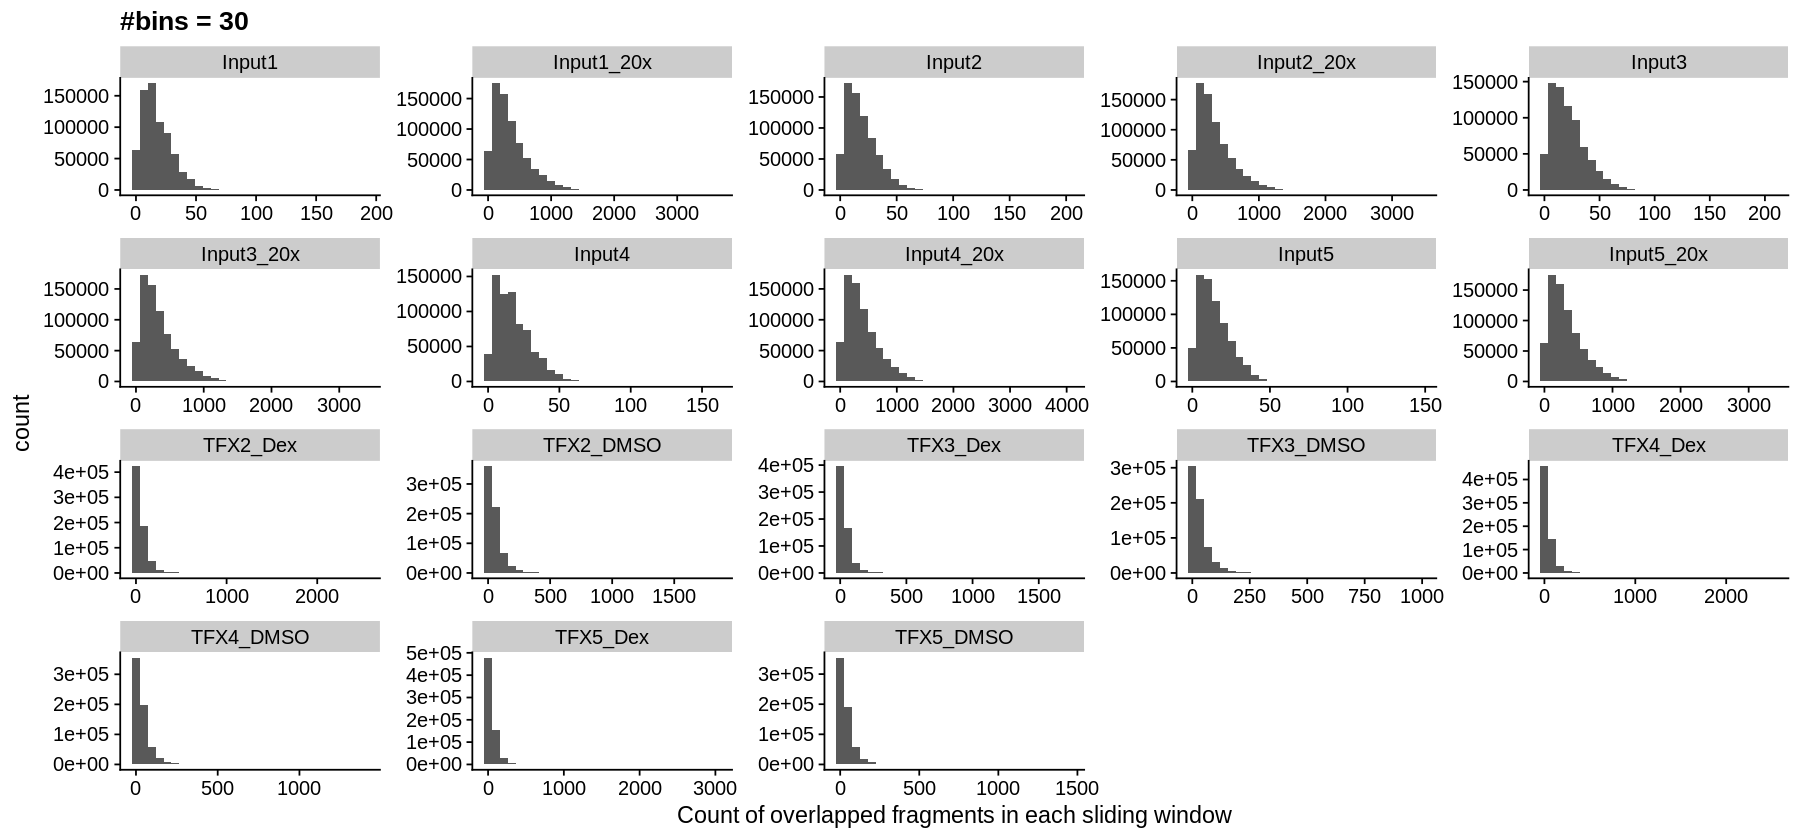

In [54]:
dat = dat_win_cnt

n_bin = 30
gpt = ggplot(dat, aes(x=Count)) + 
    geom_histogram(bins=n_bin) + 
    facet_wrap(~Sample, scale="free") + 
    theme_cowplot() + 
    labs(x="Count of overlapped fragments in each sliding window", title=paste("#bins =", n_bin))

options(repr.plot.height=7, repr.plot.width=15)
print(gpt)

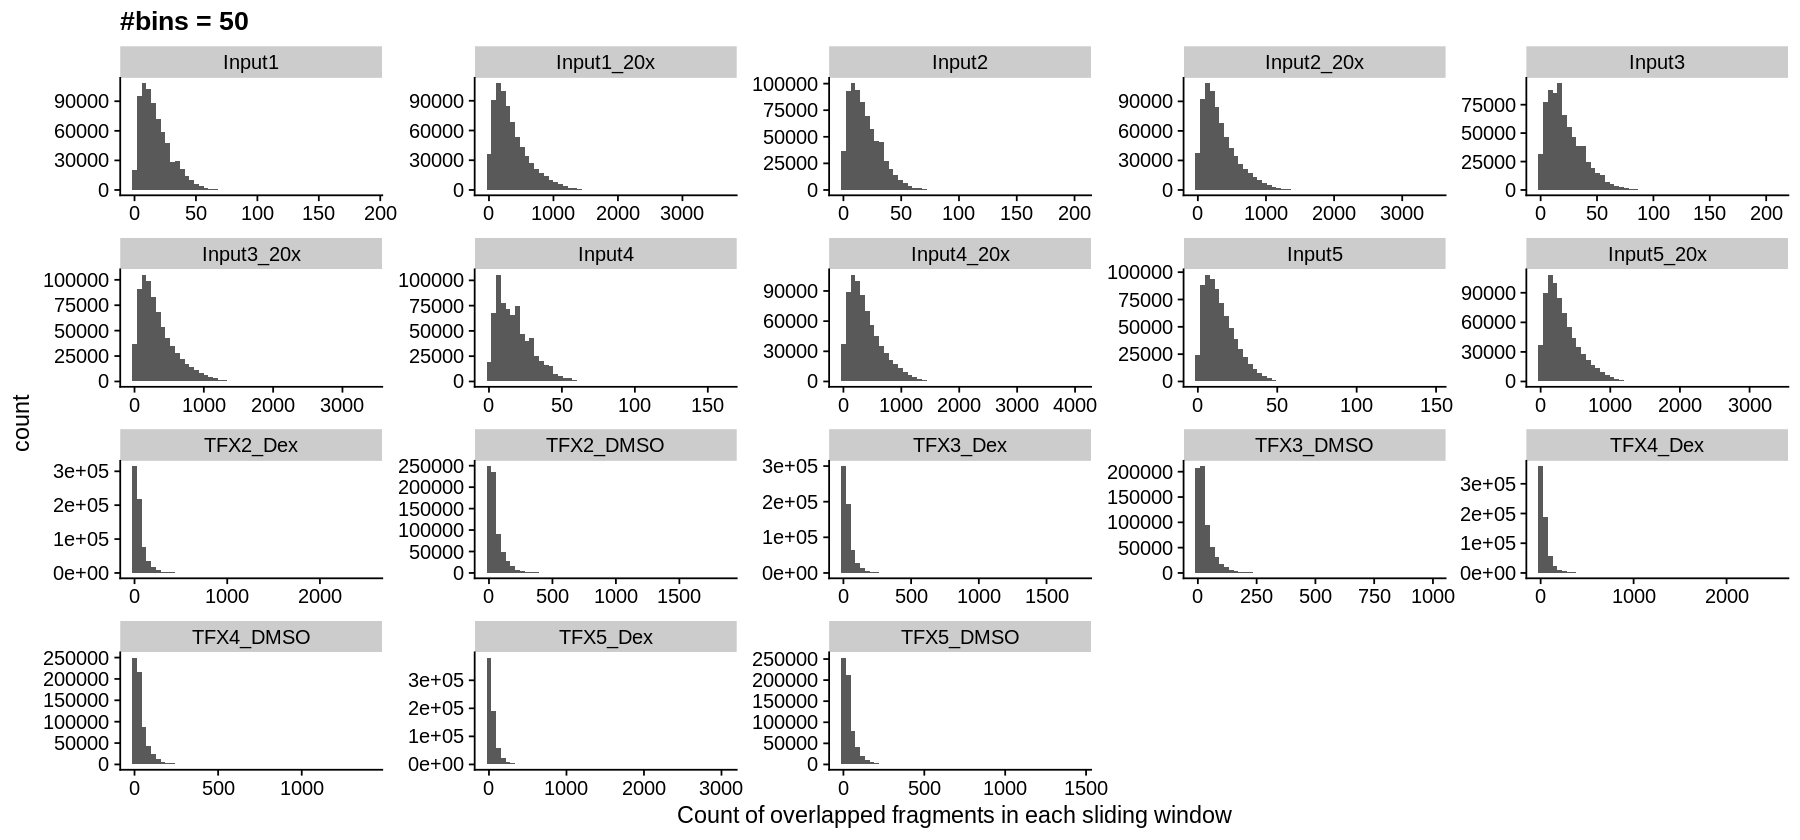

In [12]:
dat = dat_win_cnt

n_bin = 50
gpt = ggplot(dat, aes(x=Count)) + 
    geom_histogram(bins=n_bin) + 
    facet_wrap(~Sample, scale="free") + 
    theme_cowplot() + 
    labs(x="Count of overlapped fragments in each sliding window", title=paste("#bins =", n_bin))

options(repr.plot.height=7, repr.plot.width=15)
print(gpt)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 76 rows containing missing values (geom_bar).”


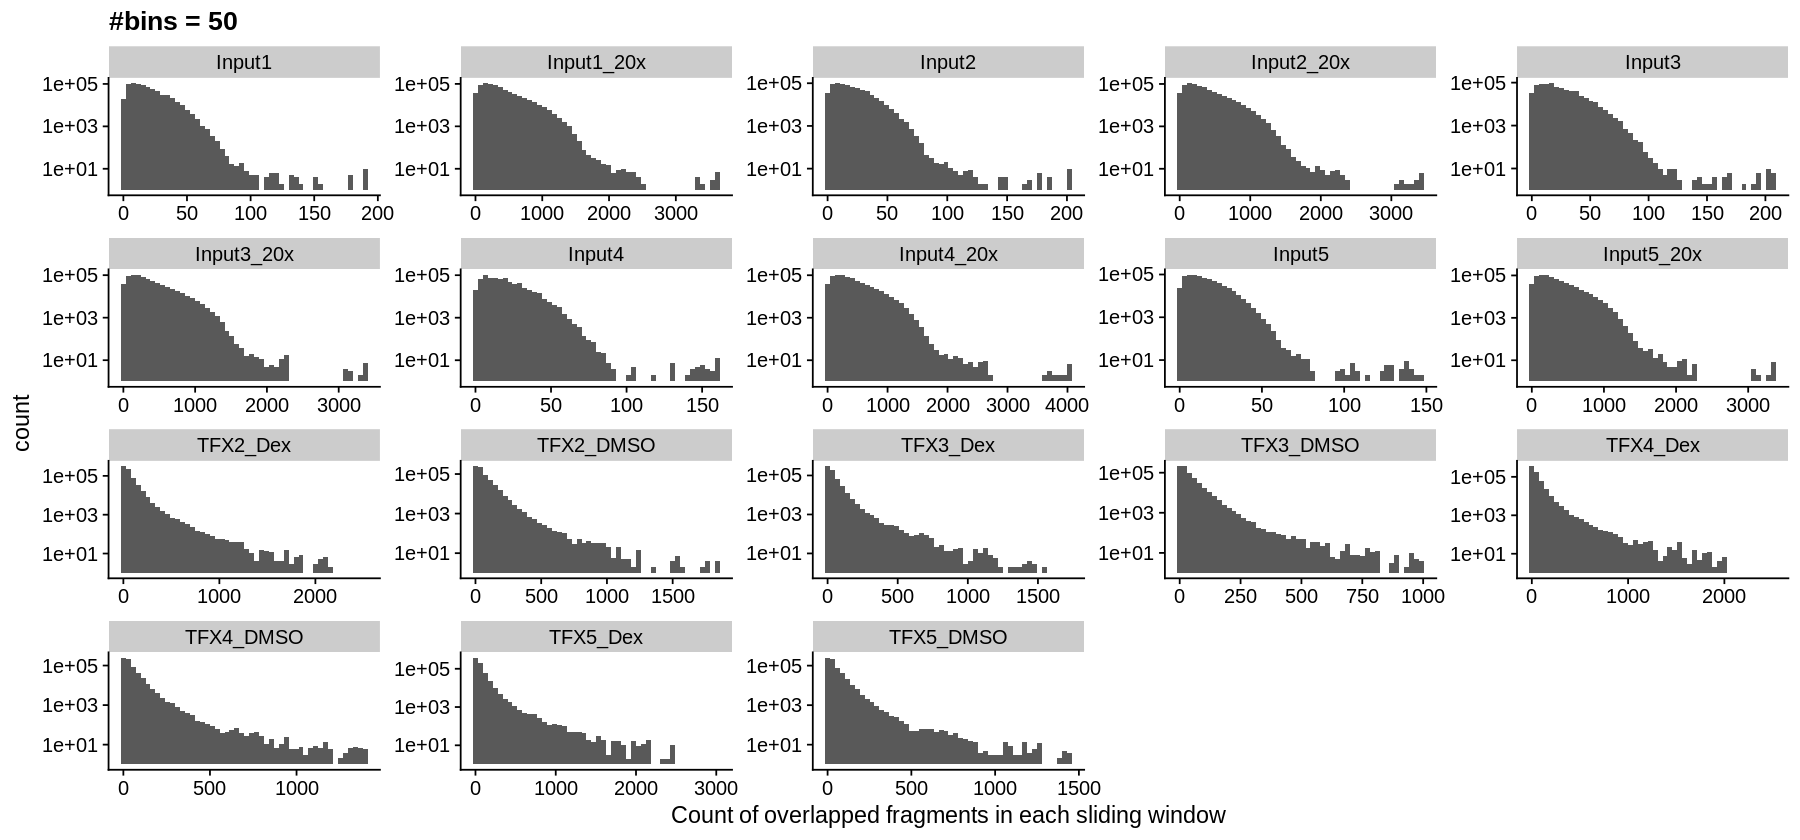

In [13]:
dat = dat_win_cnt

n_bin = 50
gpt = ggplot(dat, aes(x=Count)) + 
    geom_histogram(bins=n_bin) + 
    scale_y_log10() +
    facet_wrap(~Sample, scale="free") + 
    theme_cowplot() + 
    labs(x="Count of overlapped fragments in each sliding window", title=paste("#bins =", n_bin))

options(repr.plot.height=7, repr.plot.width=15)
print(gpt)

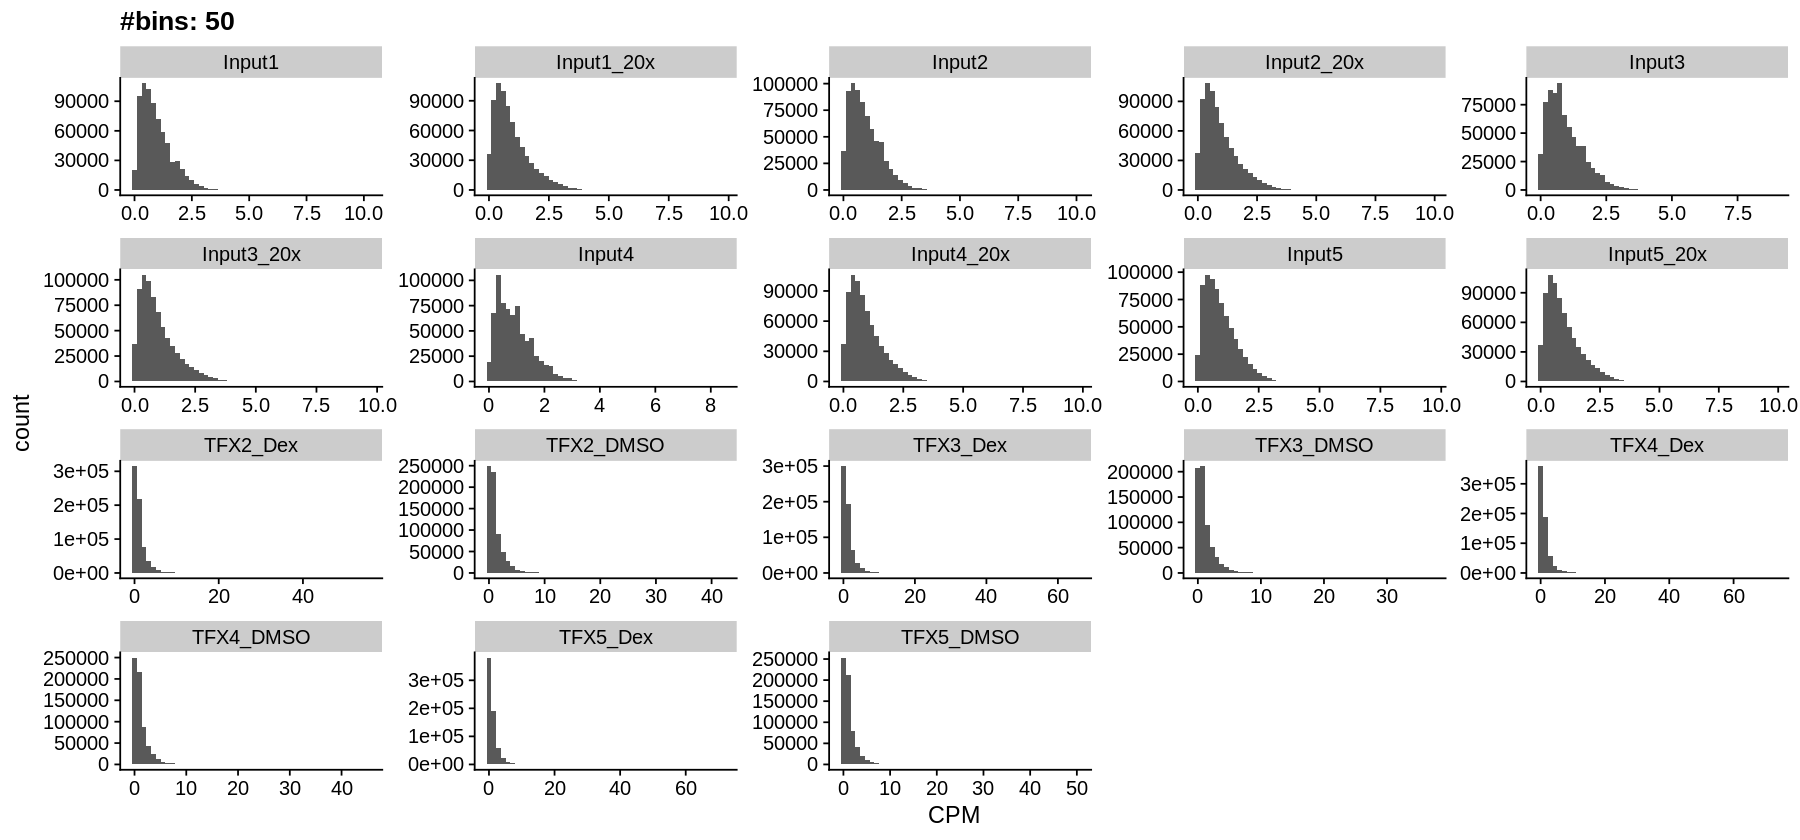

In [15]:
dat = dat_win_cnt

n_bins = 50
gpt = ggplot(dat, aes(x=CPM)) + 
    geom_histogram(bins=n_bins) + 
    facet_wrap(~Sample, scale="free") + 
    theme_cowplot() + labs(x="CPM", title=paste("#bins:", n_bins))

options(repr.plot.height=7, repr.plot.width=15)
print(gpt)

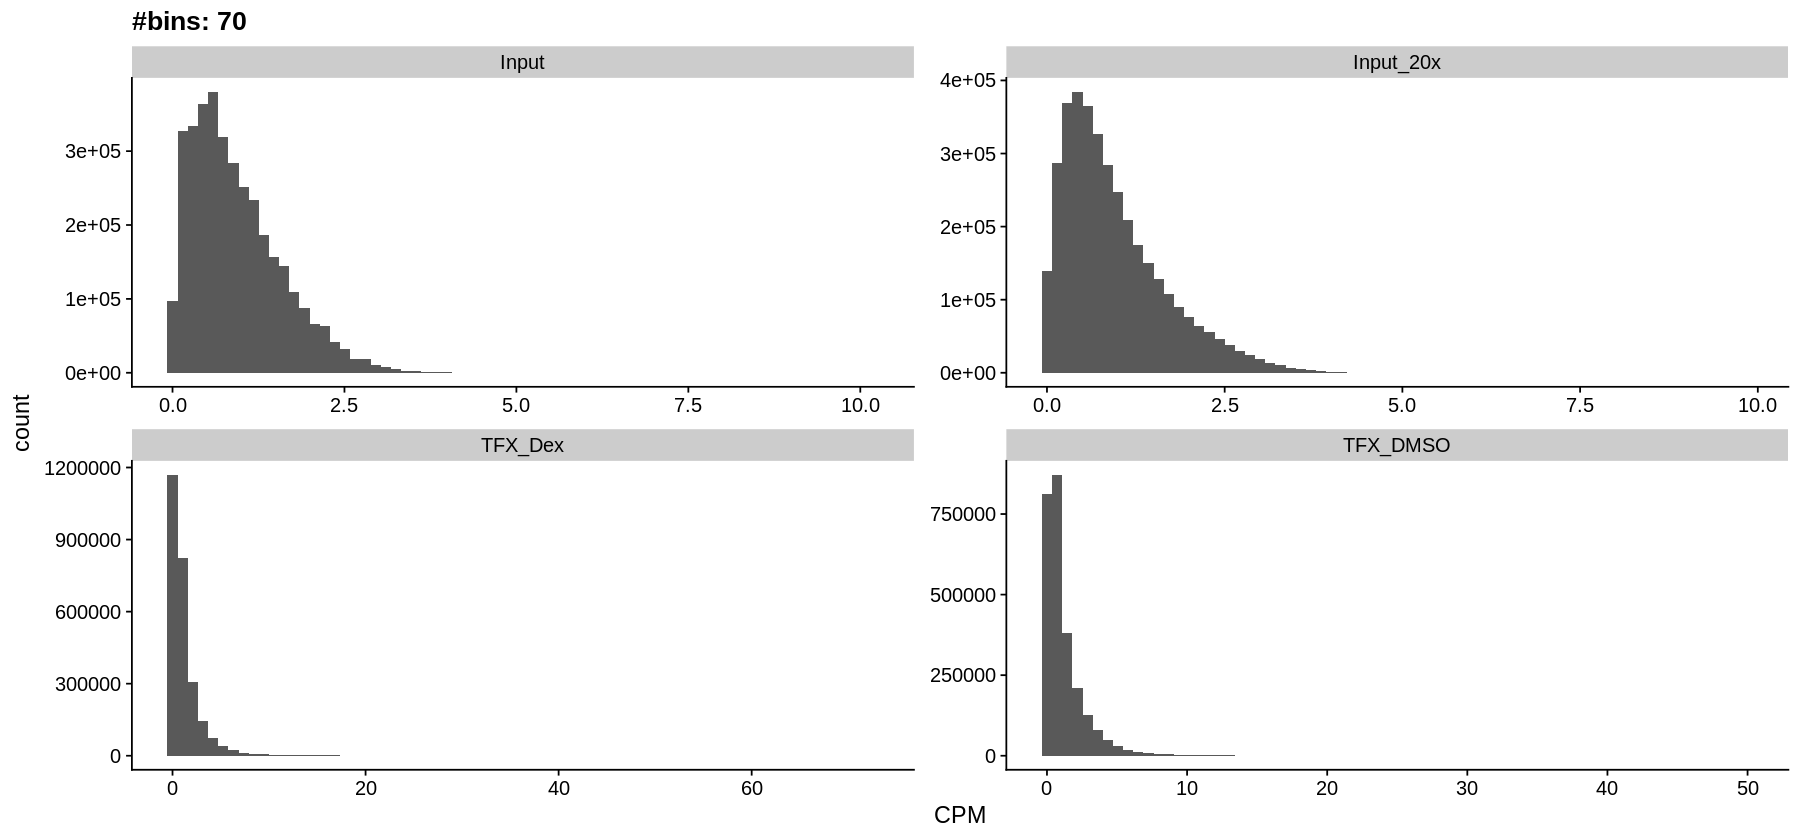

In [19]:
dat = dat_win_cnt

n_bins = 70
gpt = ggplot(dat, aes(x=CPM)) + 
    geom_histogram(bins=n_bins) +
    facet_wrap(~Group, scale="free") + 
    theme_cowplot() + labs(x="CPM", title=paste("#bins:", n_bins))

options(repr.plot.height=7, repr.plot.width=15)
print(gpt)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 13 rows containing missing values (geom_bar).”


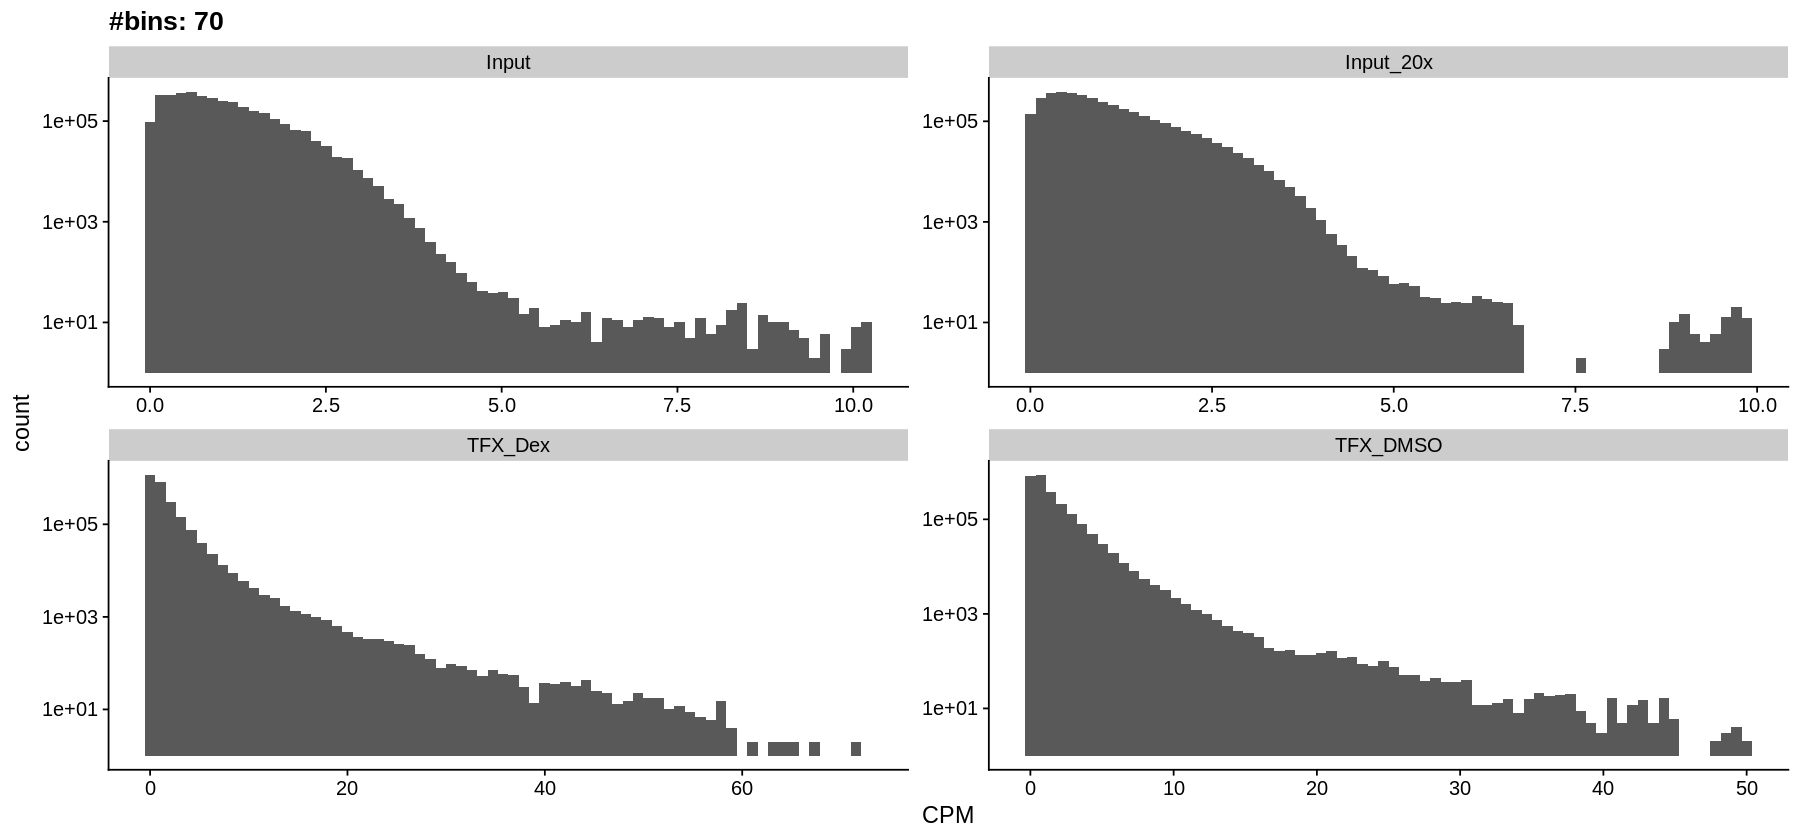

In [27]:
dat = dat_win_cnt

n_bins = 70
gpt = ggplot(dat, aes(x=CPM)) + 
    geom_histogram(bins=n_bins) +
    scale_y_log10() +
    facet_wrap(~Group, scale="free") + 
    theme_cowplot() + labs(x="CPM", title=paste("#bins:", n_bins))

options(repr.plot.height=7, repr.plot.width=15)
print(gpt)

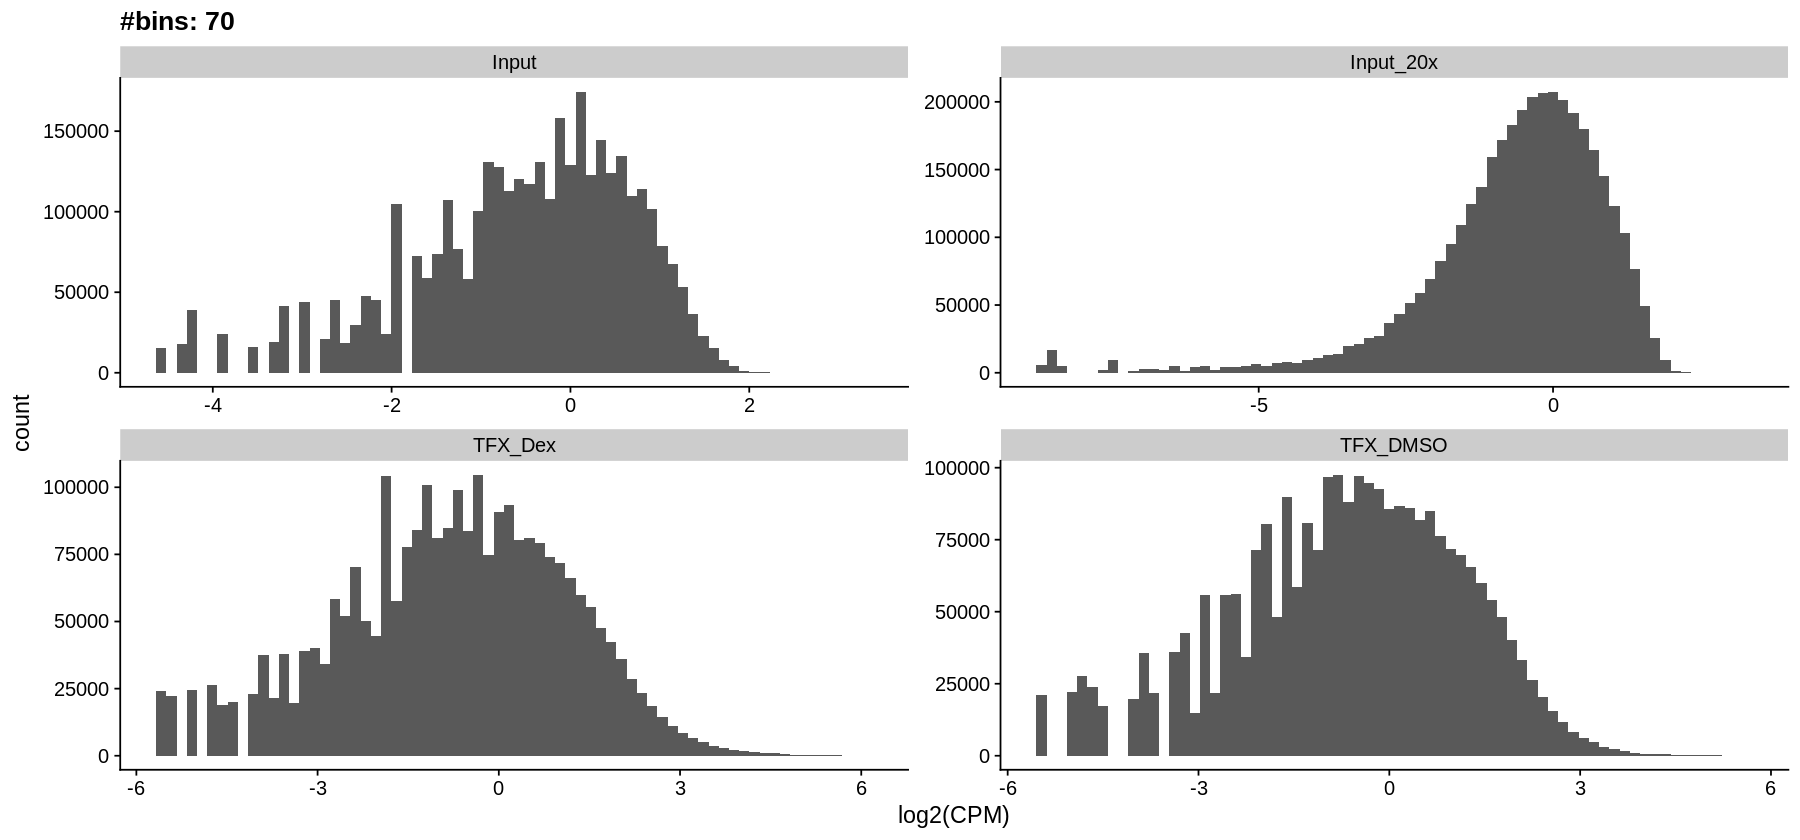

In [26]:
dat = dat_win_cnt

n_bins = 70
gpt = ggplot(dat, aes(x=log2(CPM))) + 
    geom_histogram(bins=n_bins) +
    facet_wrap(~Group, scale="free") + 
    theme_cowplot() + labs(x="log2(CPM)", title=paste("#bins:", n_bins))

options(repr.plot.height=7, repr.plot.width=15)
print(gpt)

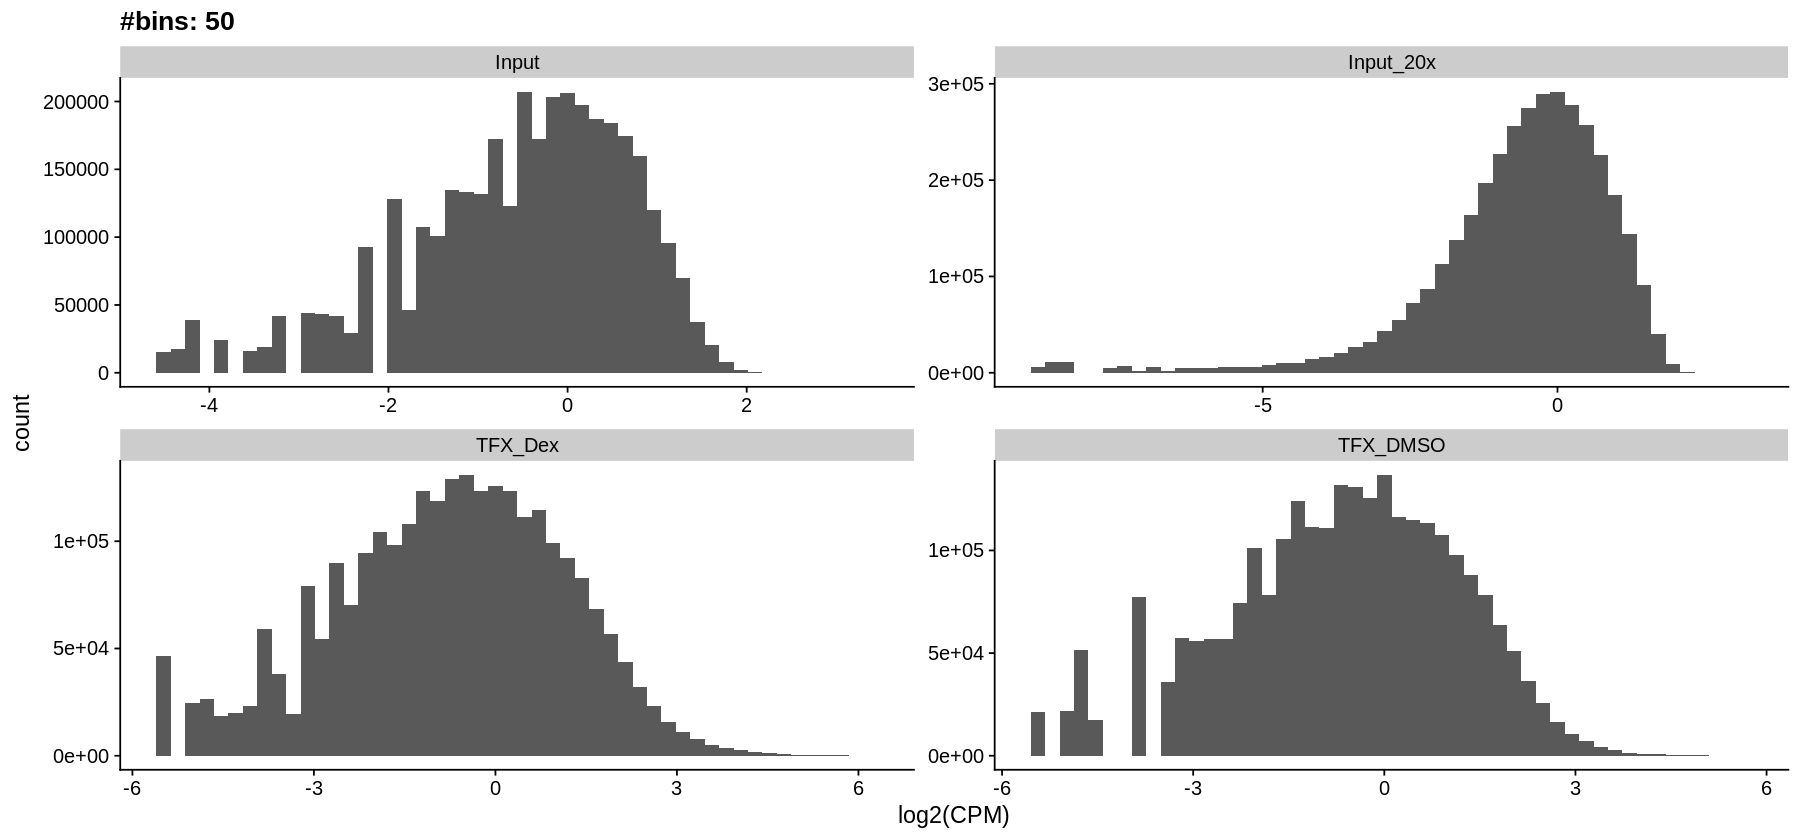

In [34]:
dat = dat_win_cnt

n_bins = 50
gpt = ggplot(dat, aes(x=log2(CPM))) + 
    geom_histogram(bins=n_bins) +
    facet_wrap(~Group, scale="free") + 
    theme_cowplot() + labs(x="log2(CPM)", title=paste("#bins:", n_bins))

options(repr.plot.height=7, repr.plot.width=15)
print(gpt)

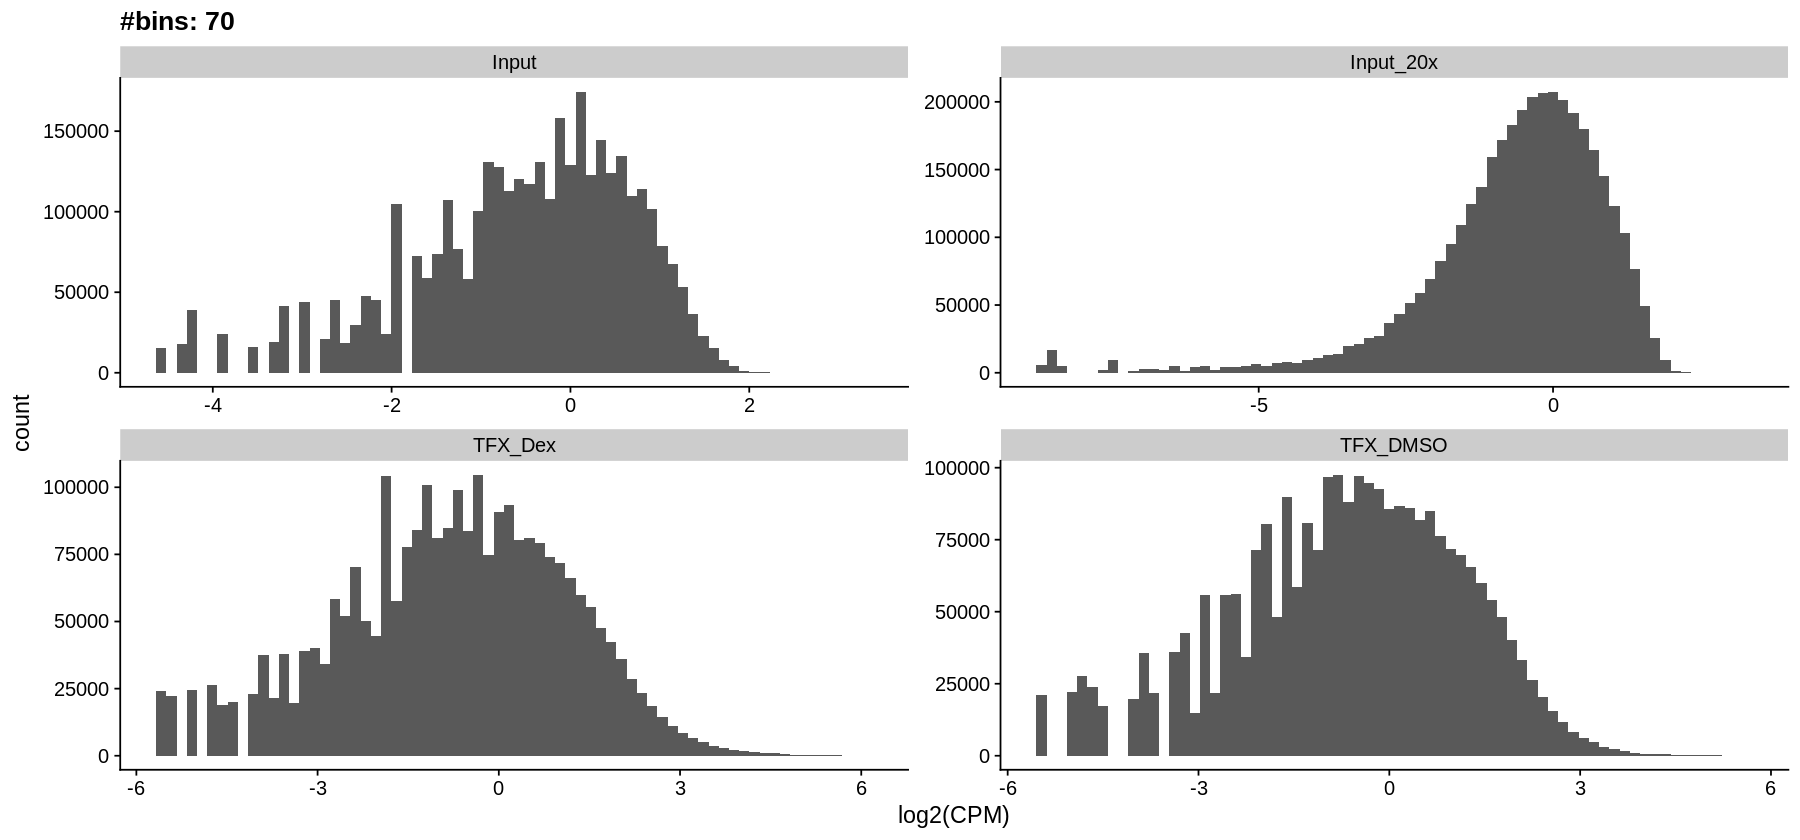

In [35]:
dat = dat_win_cnt

n_bins = 70
gpt = ggplot(dat, aes(x=log2(CPM))) + 
    geom_histogram(bins=n_bins) +
    facet_wrap(~Group, scale="free") + 
    theme_cowplot() + labs(x="log2(CPM)", title=paste("#bins:", n_bins))

options(repr.plot.height=7, repr.plot.width=15)
print(gpt)

## Mean-Variance Relationship

In [11]:
dat = dat_win_cnt
head(dat)

Chrom,Start,End,Count,Sample,Group,Size,Size_Group,CPM,Count_Resize
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,200200,201200,2,Input1,Input,18666630,19115894,0.1071431,2.048136
chr17,200300,201300,4,Input1,Input,18666630,19115894,0.2142861,4.096271
chr17,200400,201400,5,Input1,Input,18666630,19115894,0.2678577,5.120339
chr17,200500,201500,5,Input1,Input,18666630,19115894,0.2678577,5.120339
chr17,200600,201600,5,Input1,Input,18666630,19115894,0.2678577,5.120339
chr17,200700,201700,5,Input1,Input,18666630,19115894,0.2678577,5.120339


In [12]:
dat = dat_win_cnt
dat = dat %>% 
    dplyr::group_by(Chrom, Start, End, Group) %>% 
    dplyr::summarise(
        Cpm_Mean = mean(CPM),          
        Cpm_Var  = var(CPM), 
        Cpm_Std  = sd(CPM), 
        Cnt_Mean = mean(Count_Resize), 
        Cnt_Var  = var(Count_Resize), 
        Cnt_Std  = sd(Count_Resize), 
        .groups  = "drop")

###
dat_mu_var = dat
print(dim(dat))
head(dat)

[1] 2911211      10


Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,69200,70200,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69300,70300,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69400,70400,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69500,70500,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69600,70600,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69700,70700,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA


**Save table**

In [70]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp")
fname = "dat_mu_var.tsv"
fpath = file.path(fdiry, fname)

dat = dat_mu_var
write_tsv(dat, fpath)

**visualization**

In [13]:
dat = dat_mu_var
dat = dat %>% na.omit
print(dim(dat))
head(dat)

[1] 2837838      10


Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,151600,152600,TFX_Dex,0.022827400,1.304226e-06,0.0011420272,0.8308179,0.001727634,0.04156481
chr17,151700,152700,TFX_Dex,0.022827400,1.304226e-06,0.0011420272,0.8308179,0.001727634,0.04156481
chr17,151800,152800,TFX_Dex,0.022827400,1.304226e-06,0.0011420272,0.8308179,0.001727634,0.04156481
chr17,151900,152900,Input_20x,0.002674966,1.317234e-07,0.0003629372,0.9733612,0.017441119,0.13206483
chr17,151900,152900,TFX_Dex,0.022827400,1.304226e-06,0.0011420272,0.8308179,0.001727634,0.04156481
chr17,152000,153000,Input_20x,0.002674966,1.317234e-07,0.0003629372,0.9733612,0.017441119,0.13206483


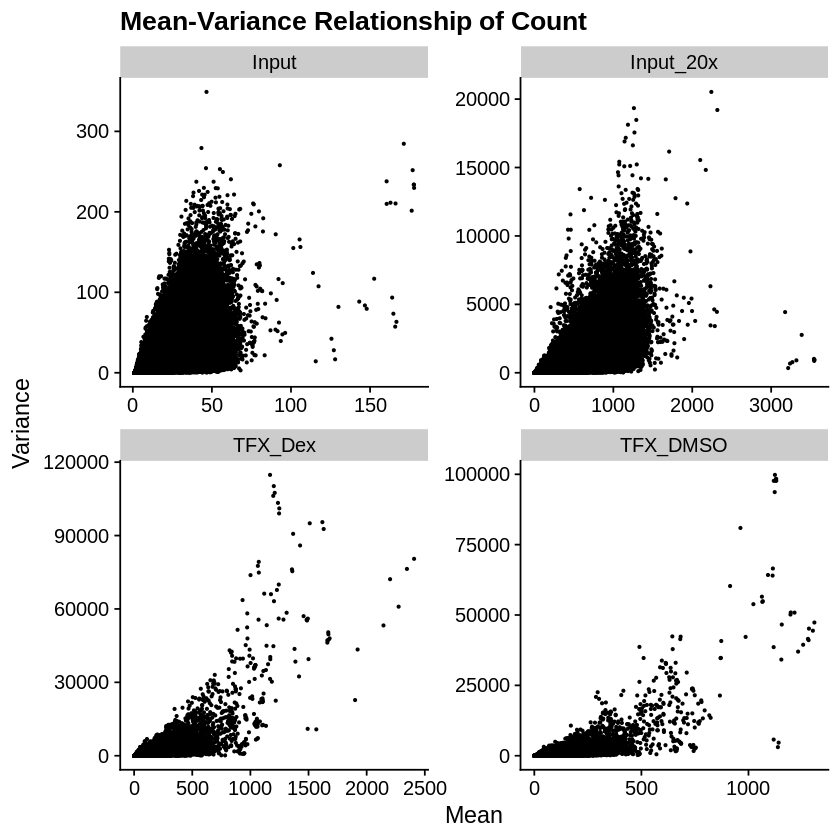

In [15]:
dat = dat_mu_var
dat = dat %>% na.omit
set.seed(123)
dat = dat %>% dplyr::sample_n(size=1000000)

gpt = ggplot(dat, aes(x=Cnt_Mean, y=Cnt_Var)) + 
    geom_point(size=0.5) + 
    theme_cowplot() + 
    facet_wrap(~Group, scale="free") +
    labs(x="Mean", y="Variance", title="Mean-Variance Relationship of Count")

options(repr.plot.height=7, repr.plot.width=7)
print(gpt)

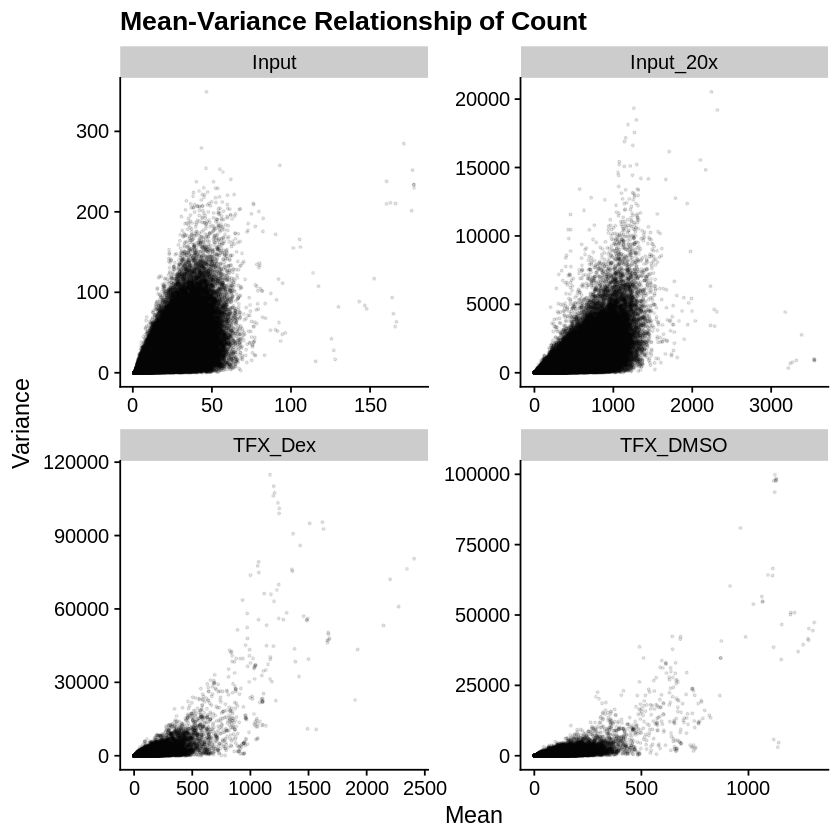

In [24]:
dat = dat_mu_var
dat = dat %>% na.omit
set.seed(123)
dat = dat %>% dplyr::sample_n(size=1000000)

gpt = ggplot(dat, aes(x=Cnt_Mean, y=Cnt_Var)) + 
    geom_point(size=0.5, alpha=0.1) + 
    theme_cowplot() + 
    facet_wrap(~Group, scale="free") +
    labs(x="Mean", y="Variance", title="Mean-Variance Relationship of Count")

options(repr.plot.height=7, repr.plot.width=7)
print(gpt)

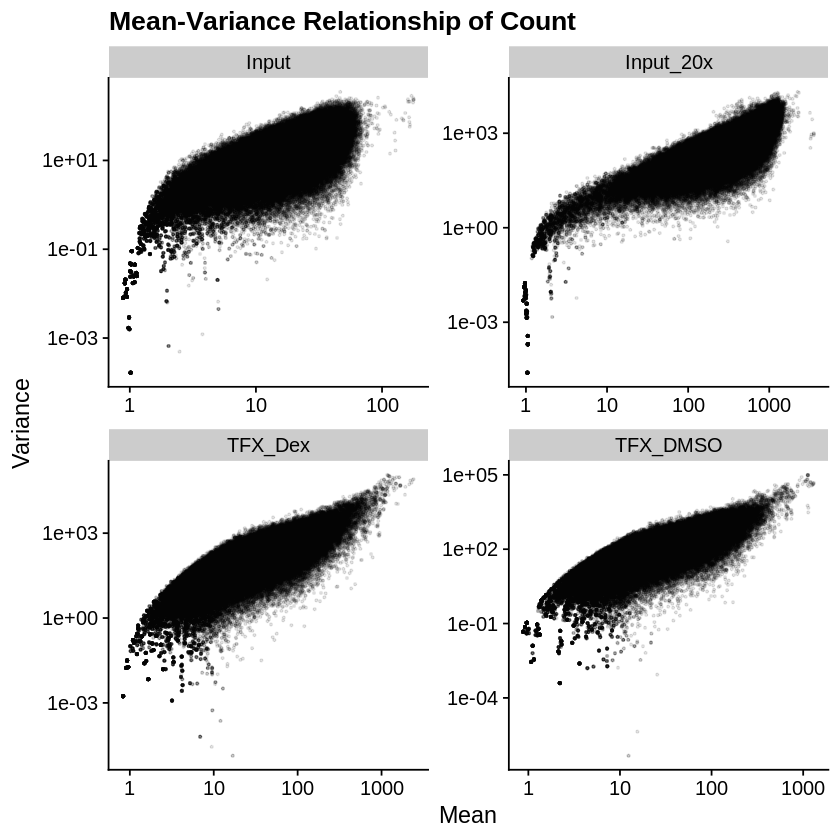

In [25]:
dat = dat_mu_var
dat = dat %>% na.omit
set.seed(123)
dat = dat %>% dplyr::sample_n(size=1000000)

gpt = ggplot(dat, aes(x=Cnt_Mean, y=Cnt_Var)) + 
    geom_point(size=0.5, alpha=0.1) + 
    scale_x_log10() + 
    scale_y_log10() +
    theme_cowplot() + 
    facet_wrap(~Group, scale="free") +
    labs(x="Mean", y="Variance", title="Mean-Variance Relationship of Count")

options(repr.plot.height=7, repr.plot.width=7)
print(gpt)

**Select input and PER1 region**

In [ ]:
dat =dat_mu_var

## Lowess curve

In [95]:
###
dat = dat_mu_var
dat = dat %>% na.omit
dat = dat %>% dplyr::filter(Group=="Input_20x")

###
dat = dat %>% mutate(
    Log_Cnt_Mean = log10(Cnt_Mean), 
    Log_Cnt_Var = log10(Cnt_Var))

###
fit_inp20x = lowess(x=dat$Log_Cnt_Mean, y=dat$Log_Cnt_Var, f=0.01)

In [96]:
###
dat = dat_mu_var
dat = dat %>% na.omit
dat = dat %>% dplyr::filter(Group=="TFX_DMSO")

###
dat = dat %>% mutate(
    Log_Cnt_Mean = log10(Cnt_Mean), 
    Log_Cnt_Var = log10(Cnt_Var))

###
fit_dmso = lowess(x=dat$Log_Cnt_Mean, y=dat$Log_Cnt_Var, f=0.01)

**Visualization**

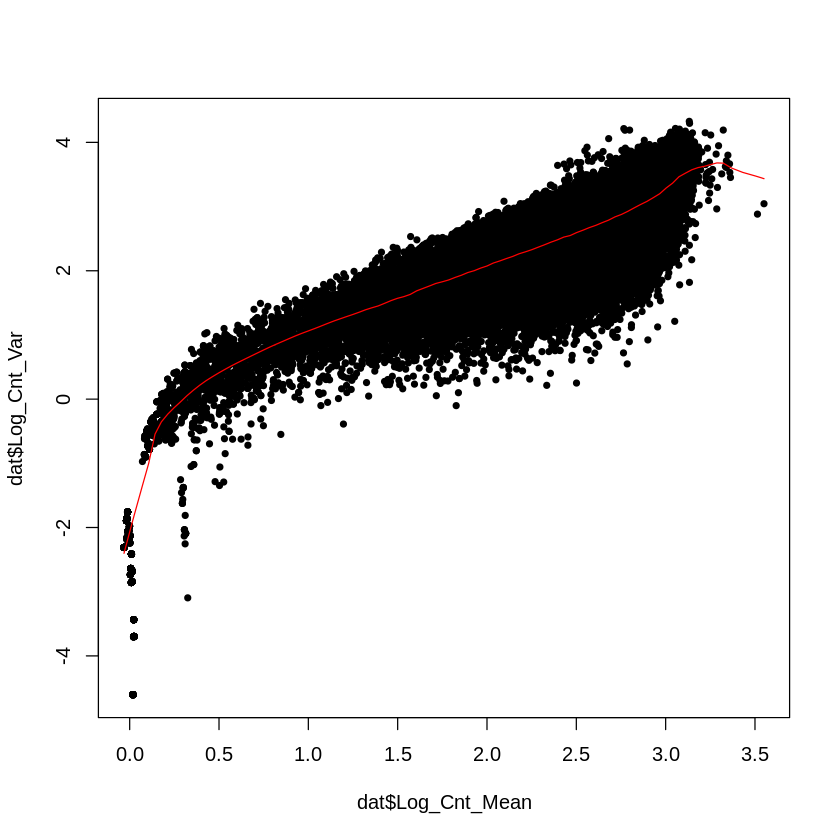

In [97]:
dat = dat_mu_var
dat = dat %>% na.omit
dat = dat %>% dplyr::filter(Group=="Input_20x")

###
set.seed(123)
dat = dat %>% dplyr::sample_n(size=100000)
dat = dat %>% mutate(
    Log_Cnt_Mean = log10(Cnt_Mean), 
    Log_Cnt_Var = log10(Cnt_Var))

fit = fit_inp20x

plot(x=dat$Log_Cnt_Mean, y=dat$Log_Cnt_Var, pch=20)
lines(fit, col="red")

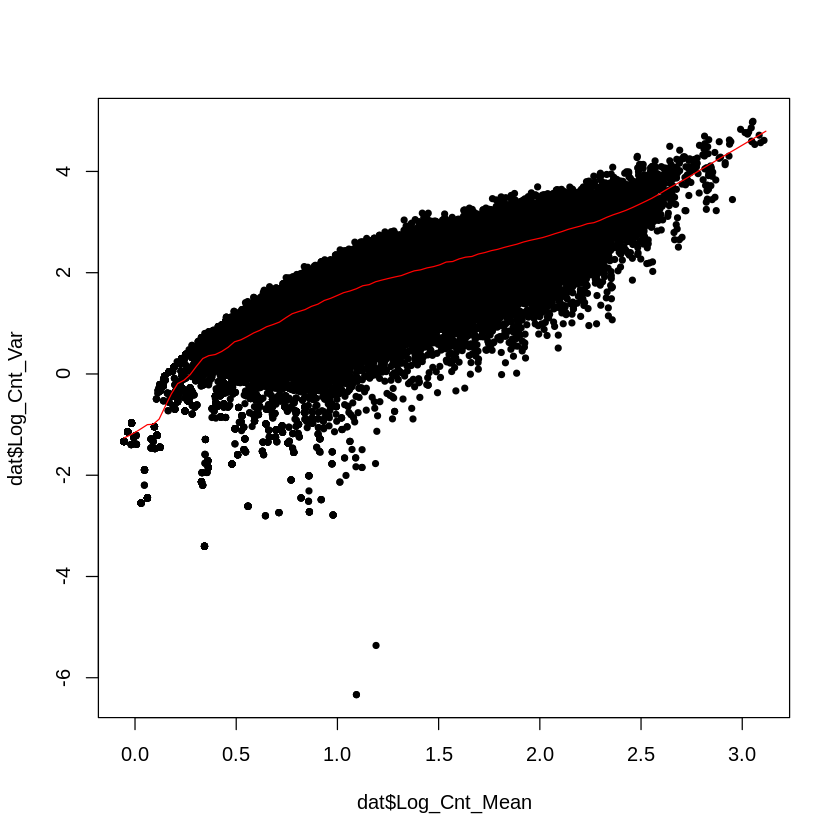

In [98]:
dat = dat_mu_var
dat = dat %>% na.omit
dat = dat %>% dplyr::filter(Group=="TFX_DMSO")

###
set.seed(123)
dat = dat %>% dplyr::sample_n(size=100000)
dat = dat %>% mutate(
    Log_Cnt_Mean = log10(Cnt_Mean), 
    Log_Cnt_Var = log10(Cnt_Var))

fit = fit_dmso

plot(x=dat$Log_Cnt_Mean, y=dat$Log_Cnt_Var, pch=20)
lines(fit, col="red")

**Save lowess curve**

In [99]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp")
fname = "lowess_input_20x.rds"
fpath = file.path(fdiry, fname)

saveRDS(fit_inp20x, file = fpath)

In [ ]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp")
fname = "lowess_tfx_dmso.rds"
fpath = file.path(fdiry, fname)

saveRDS(fit_dmso, file = fpath)

In [71]:
dat = dat_mu_var
dat = dat %>% na.omit
dat = dat %>% dplyr::filter(Group=="TFX_DMSO")

set.seed(123)
dat = dat %>% dplyr::sample_n(size=10000)
dat = dat %>% mutate(
    Log_Cnt_Mean = log10(Cnt_Mean), 
    Log_Cnt_Var = log10(Cnt_Var))
head(dat)

Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std,Log_Cnt_Mean,Log_Cnt_Var
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,20740800,20741800,TFX_DMSO,0.3808039,0.003587426,0.05989513,12.19087,3.676629,1.917454,1.086035,0.5654498
chr17,14775600,14776600,TFX_DMSO,2.0247328,0.068808176,0.26231313,64.81882,70.519120,8.397566,1.811701,1.8483069
chr17,13718400,13719400,TFX_DMSO,0.4711558,0.092271148,0.30376166,15.08336,94.565509,9.724480,1.178498,1.9757328
chr17,82440100,82441100,TFX_DMSO,3.5138814,0.963751323,0.98170837,112.49171,987.715405,31.427940,2.051121,2.9946318
chr17,28670400,28671400,TFX_DMSO,0.8792969,0.070406750,0.26534270,28.14939,72.157443,8.494554,1.449469,1.8582811
chr17,48108600,48109600,TFX_DMSO,1.2177473,0.161741730,0.40217127,38.98438,165.763507,12.874918,1.590891,2.2194889


https://www.statology.org/lowess-smoothing-r/  
https://www.statology.org/linear-interpolation-in-r/  
https://stats.stackexchange.com/questions/161069/difference-between-loess-and-lowess

In [44]:
fit = lowess(x=dat$Log_Cnt_Mean, y=dat$Log_Cnt_Var, f=0.3)
print(names(fit))
print(class(fit))
print(range(fit$x))
print(range(fit$y))

[1] "x" "y"
[1] "list"
[1] -0.05441573  3.01375169
[1] -0.9058386  4.0859462


In [46]:
### https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/approxfun
approx(fit$x, fit$y, xout=1.5, ties=mean)

$x
[1] 1.5

$y
[1] 2.147776

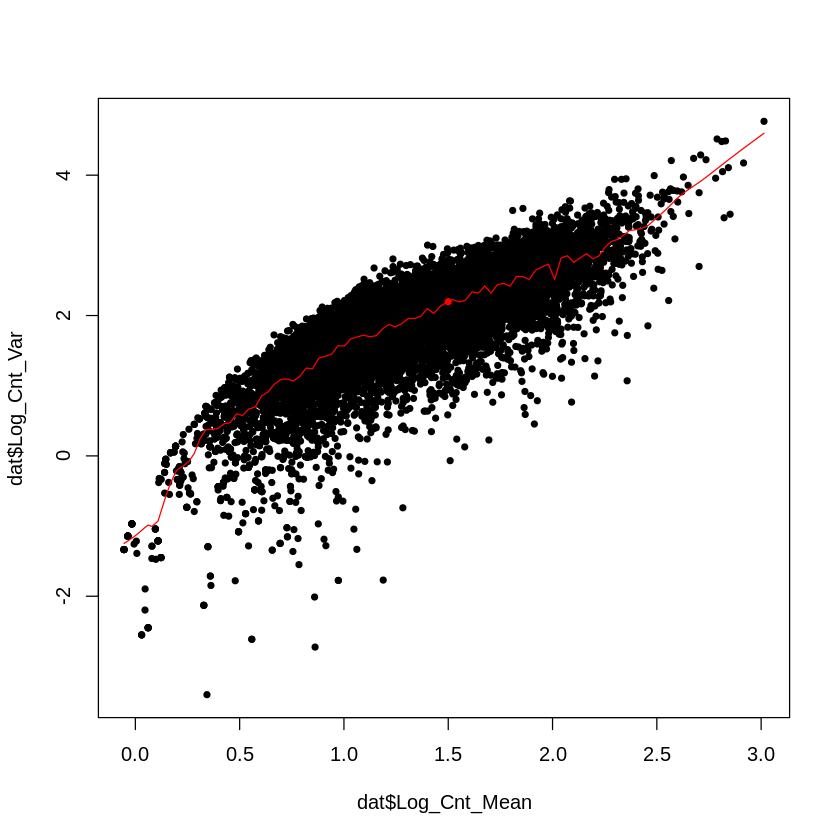

In [86]:
dat = dat_mu_var
dat = dat %>% na.omit
dat = dat %>% dplyr::filter(Group=="TFX_DMSO")

set.seed(123)
dat = dat %>% dplyr::sample_n(size=10000)
dat = dat %>% mutate(
    Log_Cnt_Mean = log10(Cnt_Mean), 
    Log_Cnt_Var = log10(Cnt_Var))

###
fit = lowess(x=dat$Log_Cnt_Mean, y=dat$Log_Cnt_Var, f=0.01)

### https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/approxfun
x_new = 1.5
y_new = approx(fit$x, fit$y, xout=x_new, ties=mean)$y

plot(x=dat$Log_Cnt_Mean, y=dat$Log_Cnt_Var, pch=20)
lines(fit, col="red")
points(x_new, y_new, col="red", pch=20)

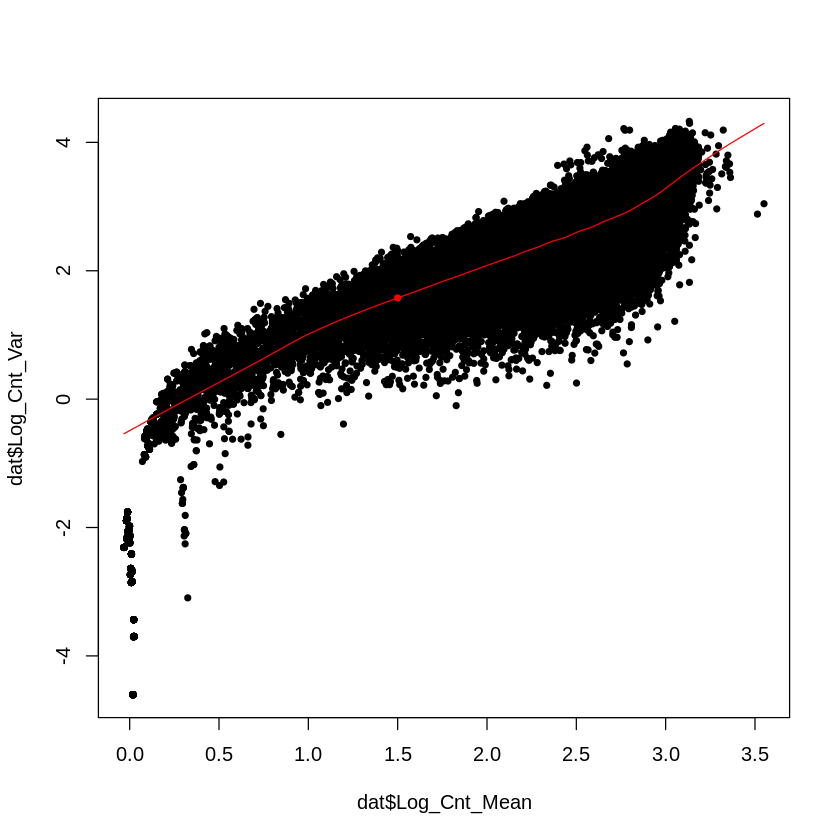

In [88]:
dat = dat_mu_var
dat = dat %>% na.omit
dat = dat %>% dplyr::filter(Group=="Input_20x")

set.seed(123)
dat = dat %>% dplyr::sample_n(size=100000)
dat = dat %>% mutate(
    Log_Cnt_Mean = log10(Cnt_Mean), 
    Log_Cnt_Var = log10(Cnt_Var))

###
fit = lowess(x=dat$Log_Cnt_Mean, y=dat$Log_Cnt_Var, f=0.1)

### https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/approxfun
x_new = 1.5
y_new = approx(fit$x, fit$y, xout=x_new, ties=mean)$y

plot(x=dat$Log_Cnt_Mean, y=dat$Log_Cnt_Var, pch=20)
lines(fit, col="red")
points(x_new, y_new, col="red", pch=20)

In [74]:
dat = dat_mu_var
dat = dat %>% na.omit
dat = dat %>% dplyr::filter(Group=="TFX_DMSO")

#set.seed(123)
#dat = dat %>% dplyr::sample_n(size=10000)
dat = dat %>% mutate(
    Log_Cnt_Mean = log10(Cnt_Mean), 
    Log_Cnt_Var = log10(Cnt_Var))

###
fit = lowess(x=dat$Log_Cnt_Mean, y=dat$Log_Cnt_Var, f=0.3)
print(dim(dat))
print(length(fit$x))

[1] 691738     12
[1] 691738


In [75]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp")
fname = "lowess_tfx_dmso.rds"
fpath = file.path(fdiry, fname)

saveRDS(fit, file = fpath)

In [76]:
dat = dat_mu_var
dat = dat %>% na.omit
dat = dat %>% dplyr::filter(Group=="Input_20x")

#set.seed(123)
#dat = dat %>% dplyr::sample_n(size=10000)
dat = dat %>% mutate(
    Log_Cnt_Mean = log10(Cnt_Mean), 
    Log_Cnt_Var = log10(Cnt_Var))

###
fit = lowess(x=dat$Log_Cnt_Mean, y=dat$Log_Cnt_Var, f=0.3)
print(dim(dat))
print(length(fit$x))

[1] 734347     12
[1] 734347


In [78]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp")
fname = "lowess_input_20x.rds"
fpath = file.path(fdiry, fname)

saveRDS(fit, file = fpath)

In [54]:
x_new = log10(3)
y_new = approx(fit$x, fit$y, xout=x_new, ties=mean)$y
print(c(10^x_new, 10^y_new))

[1] 3.000000 3.325607


In [55]:
x_new = log10(1)
y_new = approx(fit$x, fit$y, xout=x_new, ties=mean)$y
print(c(10^x_new, 10^y_new))

[1] 1.000000 0.175132


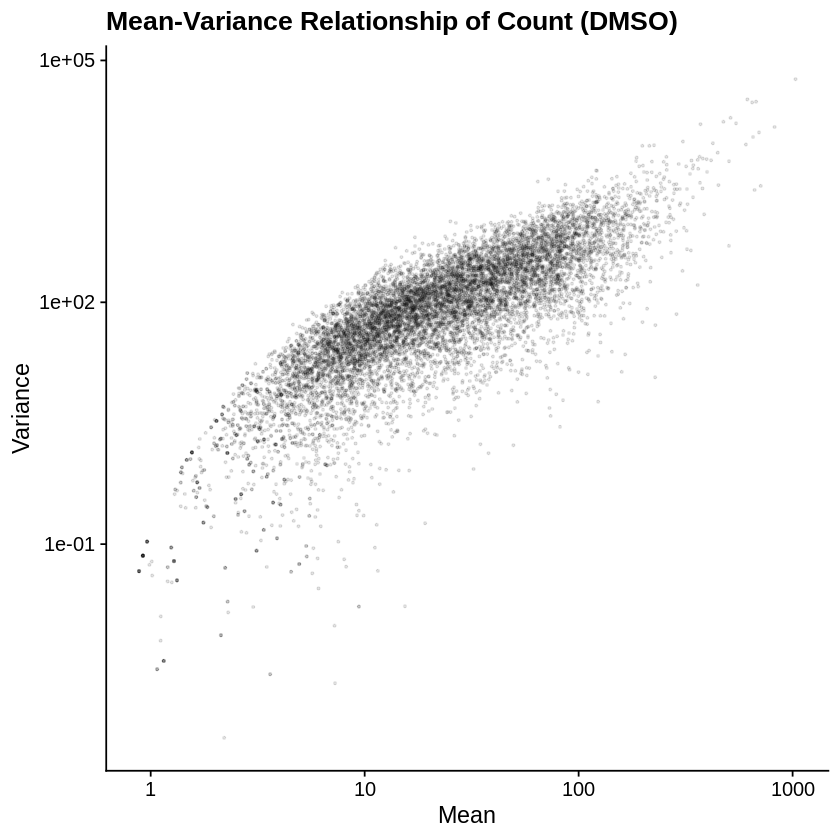

In [57]:
dat = dat_mu_var
dat = dat %>% na.omit
dat = dat %>% dplyr::filter(Group=="TFX_DMSO")

set.seed(123)
dat = dat %>% dplyr::sample_n(size=10000)

gpt = ggplot(dat, aes(x=Cnt_Mean, y=Cnt_Var)) + 
    geom_point(size=0.5, alpha=0.1) + 
    scale_x_log10() + 
    scale_y_log10() +
    theme_cowplot() + 
    labs(x="Mean", y="Variance", title="Mean-Variance Relationship of Count (DMSO)")

options(repr.plot.height=7, repr.plot.width=7)
print(gpt)

In [28]:
dat = dat_mu_var
dat = dat %>% dplyr::filter(Group=="TFX_DMSO")
head(dat)

Chrom,Start,End,Group,Mean,Var
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr17,8148000,8149000,TFX_DMSO,1.355732,0.4833742
chr17,8148001,8149001,TFX_DMSO,1.355732,0.4833742
chr17,8148002,8149002,TFX_DMSO,1.355732,0.4833742
chr17,8148003,8149003,TFX_DMSO,1.355732,0.4833742
chr17,8148004,8149004,TFX_DMSO,1.355732,0.4833742
chr17,8148005,8149005,TFX_DMSO,1.355732,0.4833742


In [ ]:
gpt = ggplot(dat, aes(x=Mean, y=Var)) + geom_

In [ ]:
#3 cutpoints at ages 25 ,50 ,60
fit<-lm(wage ~ bs(age,knots = c(25,40,60)),data = Wage )
summary(fit)